In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import pos_tag
from google.colab import files
file_path='/content/Orwell-1949 1984.txt'
with open(file_path, "r") as file:
    content = file.read()
print("TEXT CONTENT OF THE FILE:")
print(content)

TEXT CONTENT OF THE FILE:
Eric Arthur Blair (25 June 1903 – 21 January 1950), better known by his
pen name George Orwell, was an English novelist and essayist, journalist
and critic. His work is characterised by lucid prose, biting social criticism,
opposition to totalitarianism, and outspoken support of democratic
socialism.
As a writer, Orwell produced literary criticism and poetry, fiction and
polemical journalism; and is best known for the allegorical novella
Animal Farm (1945) and the dystopian novel Nineteen Eighty-Four
(1949). His non-fiction works, including The Road to Wigan Pier (1937),
documenting his experience of working-class life in the north of England,
and Homage to Catalonia (1938), an account of his experiences soldiering
for the Republican faction of the Spanish Civil War (1936–1939), are as
critically respected as his essays on politics and literature, language and
culture. In 2008, The Times ranked George Orwell second among "The
50 greatest British writers since

In [6]:
print("Length of the book ",len(content))
print("Data type of the content object is",type(content))

Length of the book  596106
Data type of the content object is <class 'str'>


In [7]:
pattern1 = re.compile(r'A THOUSAND SPLENDID SUNS', re.IGNORECASE)
pattern2 = r'\*{3}'
pattern3 = re.compile(r'AFTERWORD.*', re.DOTALL)
punctuation_pattern = re.compile(r'[^\w\s]')
page_number_pattern = re.compile(r'\b(?:[1-9]|[1-9]\d|1\d{2}|200|2[0-9][0-9]|300)\b')
chinese_pattern = re.compile(r'[\u4e00-\u9fff]+', re.UNICODE)
txt_without_headers = re.sub(pattern1, '', content)
txt_without_page_numbers = re.sub(page_number_pattern, '', txt_without_headers)
txt_without_chinese_characters = re.sub(chinese_pattern, '', txt_without_page_numbers)
filtered_text = re.sub(pattern2, '', txt_without_chinese_characters)
text_without_punctuation = re.sub(pattern3, '', filtered_text)
final_text = re.sub(punctuation_pattern, '', text_without_punctuation)
print("Modified Text:")
print(final_text)

Modified Text:
Eric Arthur Blair  June 1903   January 1950 better known by his
pen name George Orwell was an English novelist and essayist journalist
and critic His work is characterised by lucid prose biting social criticism
opposition to totalitarianism and outspoken support of democratic
socialism
As a writer Orwell produced literary criticism and poetry fiction and
polemical journalism and is best known for the allegorical novella
Animal Farm 1945 and the dystopian novel Nineteen EightyFour
1949 His nonfiction works including The Road to Wigan Pier 1937
documenting his experience of workingclass life in the north of England
and Homage to Catalonia 1938 an account of his experiences soldiering
for the Republican faction of the Spanish Civil War 19361939 are as
critically respected as his essays on politics and literature language and
culture In 2008 The Times ranked George Orwell second among The
 greatest British writers since 1945
Orwells work remains influential in popular cultu

In [21]:
nltk.download('punkt')
tokens = word_tokenize(final_text)
T1_frequency_distribution = FreqDist(tokens)
T1_frequency_distribution_org = T1_frequency_distribution
T1_frequency_distribution_org

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({'the': 5784, 'of': 3467, 'a': 2421, 'was': 2300, 'to': 2286, 'and': 2283, 'in': 1674, 'that': 1407, 'it': 1351, 'had': 1334, ...})

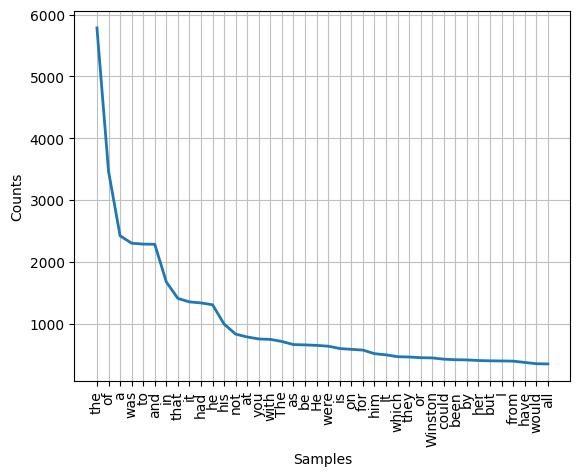

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
T1_frequency_distribution_org.plot(40)

In [23]:
len(tokens)

104840

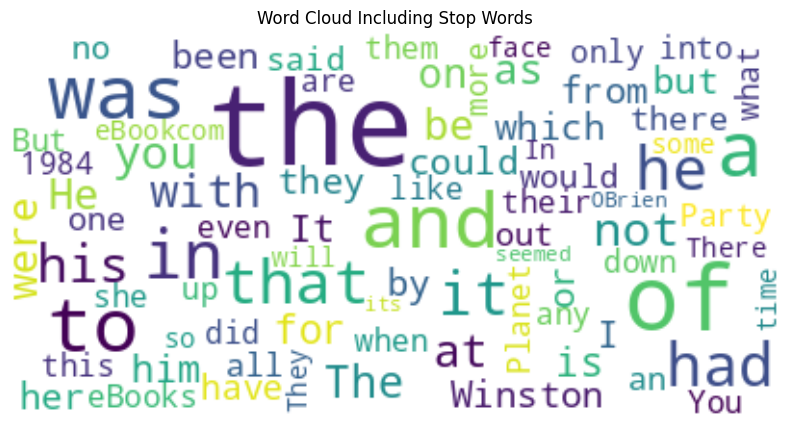

In [47]:
import matplotlib.pyplot as plot_
from matplotlib.pyplot import figure
from wordcloud import WordCloud

from collections import Counter
from collections import OrderedDict

dictionary = Counter(T1_frequency_distribution)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plot_.figure(figsize = (10, 5))
plot_.imshow(cloud, interpolation = 'bilinear')
plot_.axis('off')
plt.title("Word Cloud Including Stop Words")
plot_.show()

In [50]:
nltk.download('stopwords')
words = word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Tokenized Text without Stop Words:")
print(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenized Text without Stop Words:
['Eric', 'Arthur', 'Blair', 'June', '1903', 'January', '1950', 'better', 'known', 'pen', 'name', 'George', 'Orwell', 'English', 'novelist', 'essayist', 'journalist', 'critic', 'work', 'characterised', 'lucid', 'prose', 'biting', 'social', 'criticism', 'opposition', 'totalitarianism', 'outspoken', 'support', 'democratic', 'socialism', 'writer', 'Orwell', 'produced', 'literary', 'criticism', 'poetry', 'fiction', 'polemical', 'journalism', 'best', 'known', 'allegorical', 'novella', 'Animal', 'Farm', '1945', 'dystopian', 'novel', 'Nineteen', 'EightyFour', '1949', 'nonfiction', 'works', 'including', 'Road', 'Wigan', 'Pier', '1937', 'documenting', 'experience', 'workingclass', 'life', 'north', 'England', 'Homage', 'Catalonia', '1938', 'account', 'experiences', 'soldiering', 'Republican', 'faction', 'Spanish', 'Civil', 'War', '19361939', 'critically', 'respected', 'essays', 'politics', 'literature', 'language', 'culture', '2008', 'Times', 'ranked', 'George',

Most common words and their frequencies:
Winston: 444
could: 424
would: 350
one: 341
said: 338
Party: 266
even: 239
1984: 205
like: 199
eBooks: 196
Planet: 196
eBookcom: 196
time: 196
face: 190
OBrien: 174
seemed: 173
never: 164
Free: 163
back: 152
moment: 151


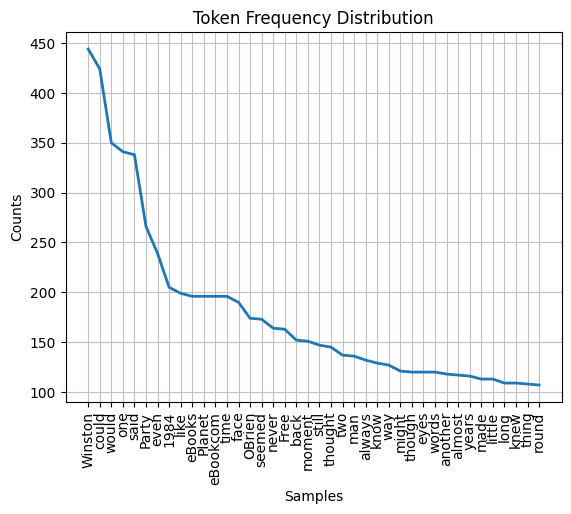

<Axes: title={'center': 'Token Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [51]:
T1_frequency_distribution_withoutstopwords = FreqDist(filtered_words)
most_common = T1_frequency_distribution_withoutstopwords.most_common(20)
print("Most common words and their frequencies:")
for word, freq in most_common:
      print(f"{word}: {freq}")
plt.title("Token Frequency Distribution")
T1_frequency_distribution_withoutstopwords.plot(40)

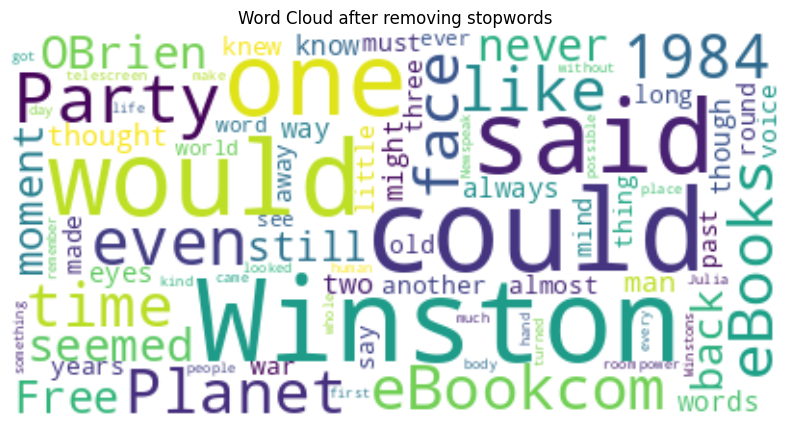

In [52]:
dictionary = Counter(filtered_words)
cloud = WordCloud(max_font_size = 60, max_words = 80, background_color = "white").generate_from_frequencies(dictionary)
plot_.figure(figsize = (10,5))
plot_.imshow(cloud, interpolation = 'bilinear')
plot_.axis('off')
plt.title("Word Cloud after removing stopwords")
plot_.show()

In [53]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
pos_tagged_words = pos_tag(filtered_words)
pos_tagged_words[:15]

[('Eric', 'NNP'),
 ('Arthur', 'NNP'),
 ('Blair', 'NNP'),
 ('June', 'NNP'),
 ('1903', 'CD'),
 ('January', 'NNP'),
 ('1950', 'CD'),
 ('better', 'JJR'),
 ('known', 'VBN'),
 ('pen', 'JJ'),
 ('name', 'NN'),
 ('George', 'NNP'),
 ('Orwell', 'NNP'),
 ('English', 'NNP'),
 ('novelist', 'NN')]

<BarContainer object of 32 artists>

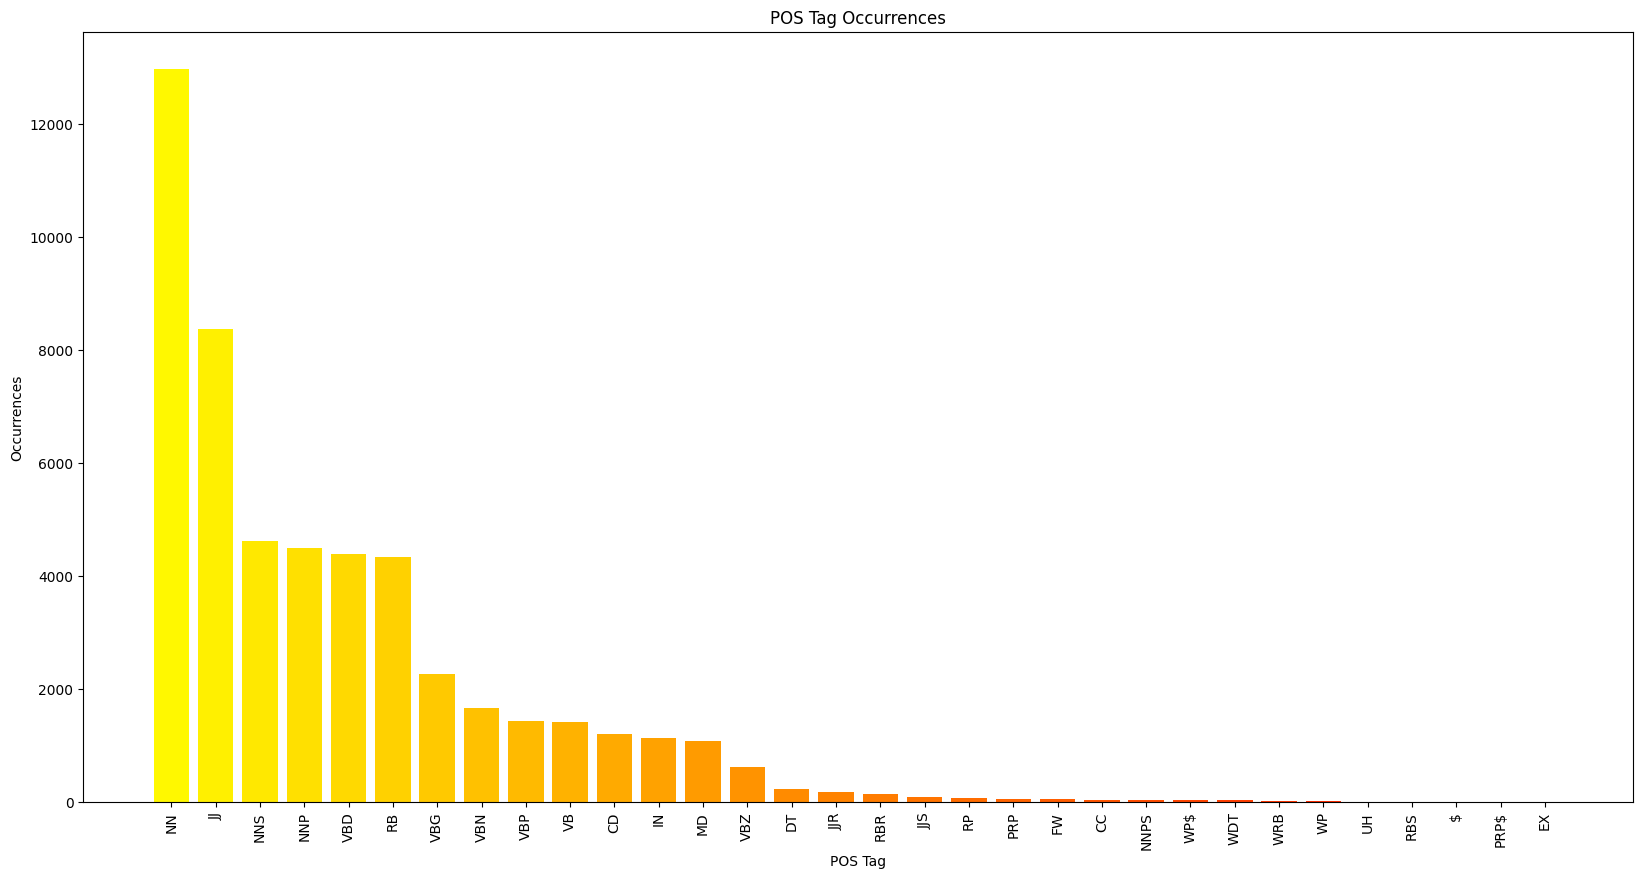

In [55]:
tag_counts = Counter(tag for word, tag in pos_tagged_words)
tags, counts = zip(*sorted(tag_counts.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(20, 10))
plt.xlabel('POS Tag')
plt.ylabel('Occurrences')
plt.title('POS Tag Occurrences')
plt.xticks(rotation=90)
plt.bar(tags, counts, color=sns.color_palette("autumn_r",len(tags)))


In [67]:
start_index = tokens.index('one') + 1
end_index = tokens.index('two', start_index)
selected_words = tokens[start_index:end_index]
selected_words[:35]


['end',
 'of',
 'it',
 'a',
 'coloured',
 'poster',
 'too',
 'large',
 'for',
 'indoor',
 'display',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall',
 'It',
 'depicted',
 'simply',
 'an',
 'enormous',
 'face',
 'more',
 'than',
 'a',
 'metre',
 'wide',
 'the',
 'face',
 'of',
 'a',
 'man',
 'of',
 'about']

In [68]:
len(selected_words)


1691

In [58]:
Chapter1to2 = selected_words
from nltk.util import bigrams
bi_grams = list(bigrams(Chapter1to2))
bigrams_frequency = nltk.FreqDist(bi_grams)
cfd = nltk.ConditionalFreqDist(bi_grams)

In [59]:
unique_words = list(set(word for bigram in bigrams_frequency for word in bigram))
bigram_matrix = pd.DataFrame(0, columns=unique_words, index=unique_words, dtype=float)
word_freq = nltk.FreqDist(Chapter1to2)
bigram_probabilities = {}
for word1 in unique_words:
  for word2 in unique_words:
    conditional_freq = cfd[word1][word2]
    first_word_count = word_freq[word1]
    probability = float(conditional_freq)/(first_word_count)
    bigram_probabilities[word1, word2] = probability
    bigram_matrix.at[word1, word2] = probability

bigram_matrix = bigram_matrix.fillna(0)
print(bigram_matrix)


           depicted  coloured  the  simply  face  moustache  metre   an  \
depicted        0.0      0.00  0.0     1.0   0.0        0.0   0.00  0.0   
coloured        0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
the             0.0      0.00  0.0     0.0   0.5        0.0   0.00  0.0   
simply          0.0      0.00  0.0     0.0   0.0        0.0   0.00  1.0   
face            0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
moustache       0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
metre           0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
an              0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
enormous        0.0      0.00  0.0     0.0   1.0        0.0   0.00  0.0   
poster          0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
than            0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
been            0.0      0.00  0.0     0.0   0.0        0.0   0.00  0.0   
large           0.0      

In [60]:
top_ten_bigrams = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:15]

print("Top Ten Bigrams with Maximum Probability:")
for bigram, probability in top_ten_bigrams:
  word1, word2 = bigram
  print(f"{word1} -> {word2}: Probability = {probability:.4f}")

Top Ten Bigrams with Maximum Probability:
depicted -> simply: Probability = 1.0000
coloured -> poster: Probability = 1.0000
simply -> an: Probability = 1.0000
moustache -> and: Probability = 1.0000
metre -> wide: Probability = 1.0000
an -> enormous: Probability = 1.0000
enormous -> face: Probability = 1.0000
poster -> too: Probability = 1.0000
than -> a: Probability = 1.0000
been -> tacked: Probability = 1.0000
large -> for: Probability = 1.0000
tacked -> to: Probability = 1.0000
It -> depicted: Probability = 1.0000
it -> a: Probability = 1.0000
wide -> the: Probability = 1.0000


In [61]:
def make_guess(previous_word, bigram_probabilities):
    later_probabilities = {word: prob for (prev, word), prob in bigram_probabilities.items() if prev == previous_word}
    optimal_guesses = sorted(later_probabilities, key=later_probabilities.get, reverse=True)
    return optimal_guesses


In [62]:
def play_shannons_game(existing_string, bigram_probabilities):
    s=" "
    print("Welcome to Shannon's Game!")
    print("Think of a word, and I will try to guess it based on the provided string.")
    print("Please respond with 'yes' or 'no' to my guesses.")
    print("You can end the game by typing 'exit'.")
    previous_word = input("Think of a starting word: ")
    print(f"Starting word: {previous_word}")
    s=s+" "+previous_word
    while True:
        guesses = make_guess(previous_word, bigram_probabilities)
        for guess in guesses:
          response = input(f"Is it '{guess}'? (yes/no): ")
          if response == 'yes':
            previous_word = guess
            s=s+" "+guess
            print(f"Sentence: {s}")
            break
          elif response=='no':
            continue
          elif response == 'exit':
            print("Thanks for playing!")
            return
          else:
            print("No more guesses. Thanks for playing!")
            return

In [69]:
start_index = tokens.index('TWO') + 1
end_index = tokens.index('three', start_index)
chapter2to3 = tokens[start_index:end_index]
chapter2to3[:15]

['AND',
 'TWO',
 'MAKE',
 'FIVE',
 'But',
 'then',
 'there',
 'came',
 'a',
 'sort',
 'of',
 'check',
 'His',
 'mind',
 'as']

In [70]:
len(chapter2to3)

2144

In [64]:
play_shannons_game(chapter2to3, bigram_probabilities)


Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: moustache
Starting word: moustache
Is it 'and'? (yes/no): no
Is it 'depicted'? (yes/no): no
Is it 'coloured'? (yes/no): yes
Sentence:   moustache coloured
Is it 'poster'? (yes/no): no
Is it 'depicted'? (yes/no): no
Is it 'coloured'? (yes/no): no
Is it 'the'? (yes/no): no
Is it 'simply'? (yes/no): no
Is it 'face'? (yes/no): no
Is it 'moustache'? (yes/no): no
Is it 'metre'? (yes/no): no
Is it 'an'? (yes/no): no
Is it 'enormous'? (yes/no): no
Is it 'than'? (yes/no): no
Is it 'been'? (yes/no): no
Is it 'large'? (yes/no): no
Is it 'tacked'? (yes/no): no
Is it 'It'? (yes/no): no
Is it 'it'? (yes/no): no
Is it 'wide'? (yes/no): no
Is it 'for'? (yes/no): yes
Sentence:   moustache coloured for
Is it 'indoor'? (yes/no): no
Is it 'depicted'? (yes/no): exit
Thanks for playing!
